# Importing Libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset.

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/dataset/Statistics.xlsx')
df.head(10)

,application_id,Interview Taken on,Status,event_name,Department,Post Name,Offered Salary
0,383422,2014-05-01 11:40:49,Hired,Male,Service Department,c8,56553.0
1,907518,2014-05-06 08:08:32,Hired,Female,Service Department,c5,22075.0
2,176719,2014-05-06 08:08:54,Rejected,Male,Service Department,c5,70069.0
3,429799,2014-05-02 16:28:59,Rejected,Female,Operations Department,i4,3207.0
4,253651,2014-05-02 16:32:26,Hired,Male,Operations Department,i4,29668.0
5,289907,2014-05-01 07:44:18,Hired,Male,Sales Department,-,85914.0
6,959124,2014-05-06 16:27:55,Rejected,Male,Sales Department,i7,69904.0
7,86642,2014-05-09 13:17:36,Rejected,Male,Sales Department,i7,11758.0
8,751029,2014-05-02 13:09:57,Hired,Female,Service Department,i4,15156.0
9,434547,2014-05-02 13:11:11,Rejected,Female,Service Department,i4,49515.0


# Data Sanity.

In [ ]:
'''Getting Basic Information about the given dataset'''

print('The basic information about the given data is as follows : \n')

df.info()

The basic information about the given data is as follows : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7168 entries, 0 to 7167
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   application_id      7168 non-null   int64         
 1   Interview Taken on  7168 non-null   datetime64[ns]
 2   Status              7168 non-null   object        
 3   event_name          7168 non-null   object        
 4   Department          7168 non-null   object        
 5   Post Name           7168 non-null   object        
 6   Offered Salary      7167 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 392.1+ KB


We can see that variable name 'application_id' has 7168 entries with dtype 'int64', variable name 'Status','event_name','Department','Post Name' has 7168 entries with dtype 'object', variable name 'Interview Taken On' has 7168 entries with dtype 'datetime64[ns]'.

In [ ]:
'''Getting the idea of number of rows and columns'''

print(f'The shape of above dataset is : {df.shape} \n')

print(f'The rows of above dataset is : {df.shape[0]} \n')

print(f'The columns of above dataset is : {df.shape[1]} \n')


The shape of above dataset is : (7168, 7) 

The rows of above dataset is : 7168 

The columns of above dataset is : 7 



In [ ]:
'''Checking for null values if any'''

print('Total number of null values in follow data is : \n')

df.isnull().sum()

Total number of null values in follow data is : 



application_id        0
Interview Taken on    0
Status                0
event_name            0
Department            0
Post Name             0
Offered Salary        1
dtype: int64

we can see that variable name 'Offered Salary' has one null value which we can drop it off.

# Explorating Data Analysis.

# Task 1 : How many males and females are Hired ?

In [ ]:
print('Number of Male and Females hired are \n')

df[((df['event_name']=='Male')|(df['event_name']=='Female'))]['Status'].value_counts()

Number of Male and Females hired are 



Hired       4419
Rejected    2341
Name: Status, dtype: int64

So we can see that Number of male and females hired are 4419.

# Task 2 : What is the average salary offered in this company ?

In [ ]:
print(f'The average salary offered in this company is : {df["Offered Salary"].mean()} ')

The average salary offered in this company is : 49983.02902190596 


# Task 3 : Draw the class intervals for salary in the company ?

As we know that we have one null value in the column 'Offered Salary' so our first step will be to drop the null values.

In [ ]:
df.dropna(inplace=True)

print('Null value is drop \n')

print('To verify \n')

print('Checking whether null values is dropped or not : \n')

df.isnull().sum()

Null value is drop 

To verify 

Checking whether null values is dropped or not : 



application_id        0
Interview Taken on    0
Status                0
event_name            0
Department            0
Post Name             0
Offered Salary        0
dtype: int64

Next to get the inteval of 'Offered Salary' we have to calculate 25th and 75th percentile and then subtract it.

In [ ]:
Q1 = np.percentile(df['Offered Salary'], 25)
Q3 = np.percentile(df['Offered Salary'], 75)
class_interval = Q3 - Q1

print(f'Class Interval of Salary is found to be : {class_interval}')

Class Interval of Salary is found to be : 48977.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


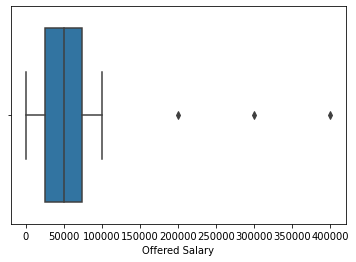

In [ ]:
'''Plotting the Interval using Boxplot'''

sns.boxplot(df['Offered Salary'])

# Statistical Detail of Dataset.

In [ ]:
print('The statistical detail of data is as follows : \n')

df.describe()

The statistical detail of data is as follows : 



,application_id,Offered Salary
count,7167.000000,7167.000000
mean,508703.517650,49983.029022
std,285128.056354,28854.176890
min,12073.000000,100.000000
25%,262397.000000,25460.500000
50%,508051.000000,49625.000000
75%,757401.500000,74438.000000
max,999936.000000,400000.000000


# Task 4 : Draw Pie Chart / Bar Graph ( or any other graph ) to show proportion of people working different department ?

To see the proportion of people working in different deparment first we will see unique values in the department and their counts.

In [ ]:
print('Unique Values and their counts are as follows : \n')

df['Department'].value_counts()

Unique Values and their counts are as follows : 



Operations Department        2771
Service Department           2055
Sales Department              746
Production Department         380
Purchase Department           333
Marketing Department          325
Finance Department            288
General Management            172
Human Resource Department      97
Name: Department, dtype: int64

# Data Visualization of proportion of people working in different department.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'Service Department'),
 Text(0, 0, 'Operations Department'),
 Text(0, 0, 'Sales Department'),
 Text(0, 0, 'Finance Department'),
 Text(0, 0, 'Production Department'),
 Text(0, 0, 'Purchase Department'),
 Text(0, 0, 'Marketing Department'),
 Text(0, 0, 'General Management'),
 Text(0, 0, 'Human Resource Department')]

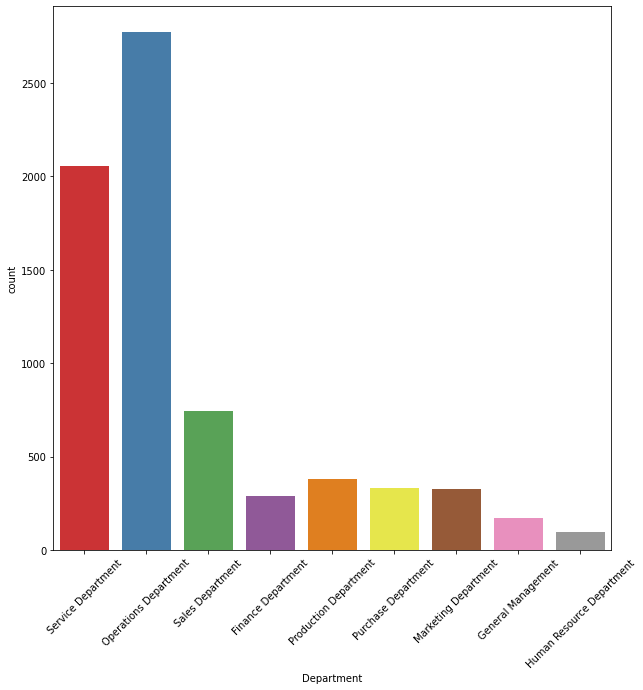

In [ ]:
'''Data Visualization of proportion of people working in different department'''

plt.figure(figsize=(10,10))
chart = sns.countplot(df['Department'], x = 'Departments', palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

# Now lets get into deeper analysis by looking different 'event_name' working in different deparment.

In [ ]:
df['event_name'].value_counts()

Male                 4084
Female               2675
Don’t want to say     393
-                      15
Name: event_name, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


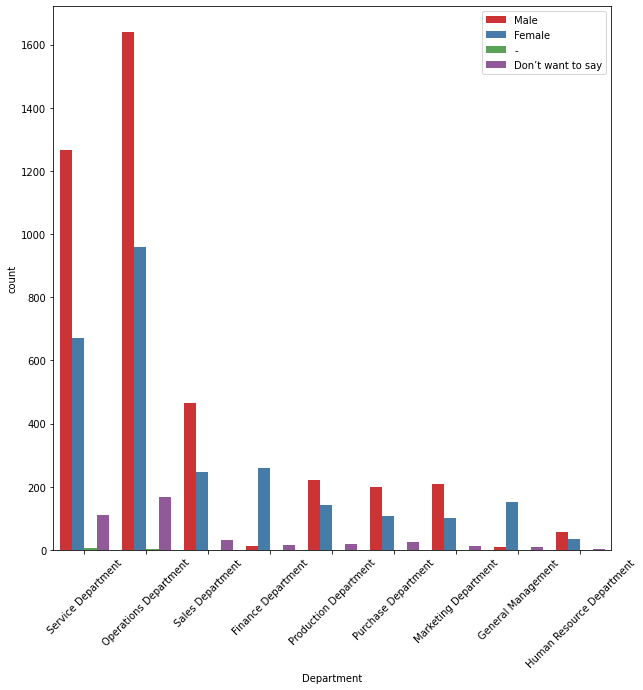

In [ ]:
'''Data Visualization of different 'event_name' working in different deparment'''

plt.figure(figsize=(10,10))
chart = sns.countplot(df['Department'], x = 'Departments', hue= df['event_name'], palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.legend(loc=1)

we can see that 'Male' and 'Female' are more in proportion working in different department as compare to '-', 'Dnt want to say'.

# Also we will see number of people hired and rejected in different deparment.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


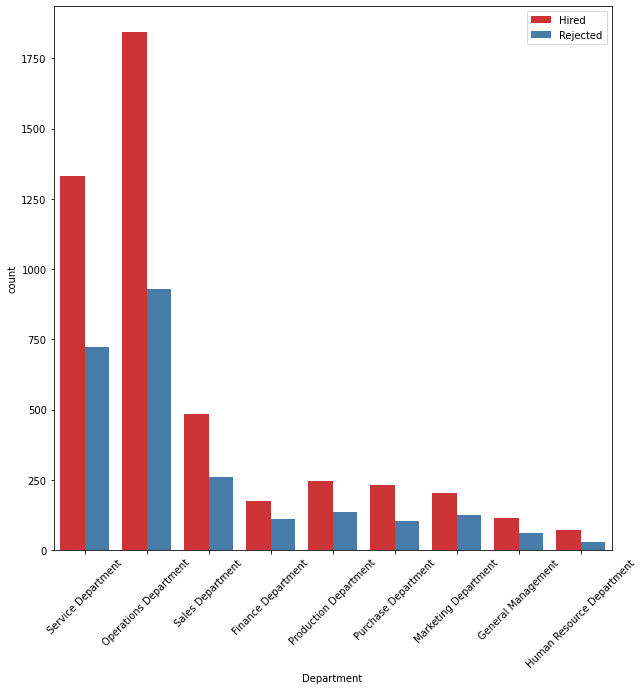

In [ ]:
plt.figure(figsize=(10,10))
chart = sns.countplot(df['Department'], x = 'Departments', hue= df['Status'], palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.legend(loc=1)

# Task 5 : Represent different post tiers using chart/graph?

First we will see the unique values of 'Post Name' and their counts.

In [ ]:
df['Post Name'].value_counts()

c9      1792
c5      1747
i7       981
i5       787
i6       527
b9       463
c8       320
c-10     232
i1       222
i4        88
m6         3
-          1
n10        1
m7         1
n9         1
n6         1
Name: Post Name, dtype: int64

# Data Visualization of 'Post Name' with 'Status'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


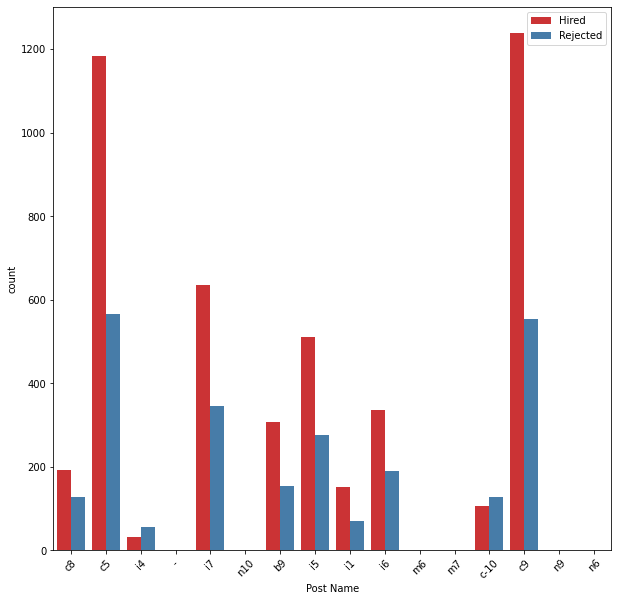

In [ ]:
plt.figure(figsize=(10,10))
chart = sns.countplot(df['Post Name'], x = 'Post Name', hue= df['Status'], palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.legend(loc=1)

we can see from above countplot that no one was hired and rejected in '-','n10', 'm6', 'm7', 'n9', 'n6'.

# Data Visualization of 'Post Name' and 'Status'.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


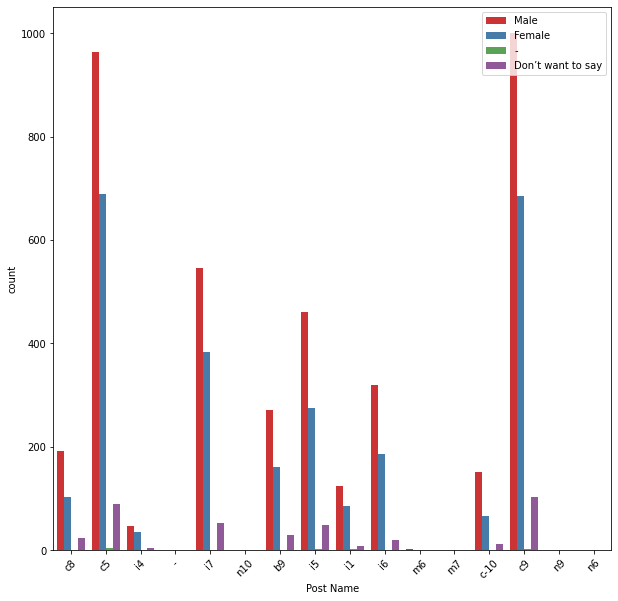

In [ ]:
plt.figure(figsize=(10,10))
chart = sns.countplot(df['Post Name'], hue= df['event_name'], palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.legend(loc=1)

In [ ]:
df['status'] = df['Status'].apply(lambda x: 1 if x == 'Hired' else 0)

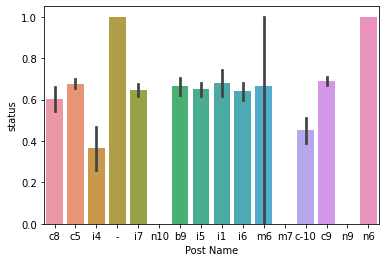

In [ ]:
sns.barplot(x =df['Post Name'], y = df['status'])